# Bigmart Sales Prediction 

# Introduction:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. The total attributes for the dataset observed is 8523 Also, certain attributes of each
product and store have been defined.

#Data Description:

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

# Problem Statement

The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train_UWu5bXk (2) (1) (1) (1).csv to Train_UWu5bXk (2) (1) (1) (1).csv


In [ ]:
train_df = pd.read_csv("Train_UWu5bXk (2) (1) (1) (1).csv")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Test_u94Q5KV (2) (1) (1) (1).csv to Test_u94Q5KV (2) (1) (1) (1).csv


In [ ]:
#test_df = pd.read_csv("Test_u94Q5KV (2) (1) (1) (1).csv")

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train_df.shape

(8523, 12)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### We can see , there are 5 numeric and 7 categorical variables.

In [ ]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Since Item_Weight contains 1463 null and Outlet_Size has 2410 null values

#Data Wrangling

In [ ]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train_df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
train_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# converting to date1time format 

#train_df['Outlet_Establishment_Year'] = pd.to_datetime(train_df['Outlet_Establishment_Year'])

In [ ]:
from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(train_df['Item_Weight'].values.reshape(-1,1))
train_df['Item_Weight'] = imputer.transform(train_df['Item_Weight'].values.reshape(-1,1))

In [ ]:
train_df['Outlet_Size'] = train_df.Outlet_Size.fillna("Medium")

In [ ]:
train_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


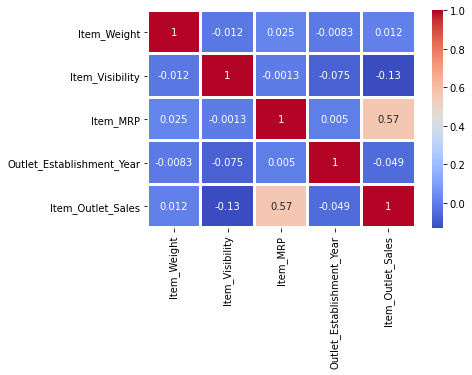

In [ ]:
sns.heatmap(train_df.corr(), linecolor='white',linewidth=2, cmap='coolwarm',annot=True)

# Findings:


> We see weak and irrelavent correlations between- 


*   Item_weight and Item_Visibility
*   Item_Visibility and Outlet_Establishment_year
*   Outlet_Establishment_year and Item_Outlet_Sales
*   Item_Visibility and Item_Outlet_Sales
 







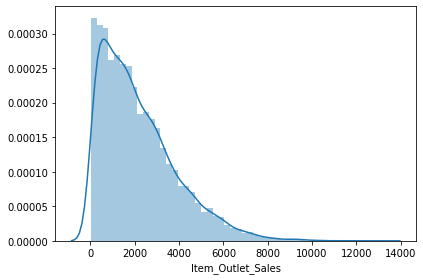

In [ ]:
#plt.figure(figsize=(15,8))
sns.distplot(train_df["Item_Outlet_Sales"])
#plt.title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
#plt.xlabel("Item_Type", fontsize=12)
#plt.ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
#plt.xticks(
    #rotation=45, 
   # horizontalalignment='right',
   # fontweight='light',
    #fontsize='x-large')
plt.tight_layout()

In [ ]:
print("Skewness: %f" % train_df["Item_Outlet_Sales"].skew())
print("Kurtosis: %f" % train_df["Item_Outlet_Sales"].kurt())

Skewness: 1.177531
Kurtosis: 1.615877


#Findings:

The graph above deviates from the normal distribution.
Also it is right skewd and would need some data transformation to treat its skewness.

# Why do we need Exploratory Data Analysis (EDA)?
After understanding the dimensions and properties of data, we have to dig deep and explore the data visually. It helps us in understanding the nature of data in terms of distribution of the individual variables/features, finding missing values, relationship with other variables and many other things.

*As, our ultimate goal is to predict Item_Outlet_Sales for given test data*

#EDA

##Univariate Analysis

In [ ]:
# Univariate Analysis 

Text(0.5, 1.0, 'Items Fat Content')

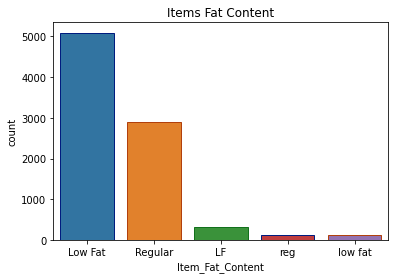

In [ ]:
sns.countplot(x = 'Item_Fat_Content',
              data = train_df,
              order = train_df['Item_Fat_Content'].value_counts().index,
              edgecolor=sns.color_palette("dark", 3))
plt.title('Items Fat Content')

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly it can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again.

In [ ]:
replace_1 = {'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'}
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace(replace_1)

Text(0.5, 1.0, 'Items Fat Content')

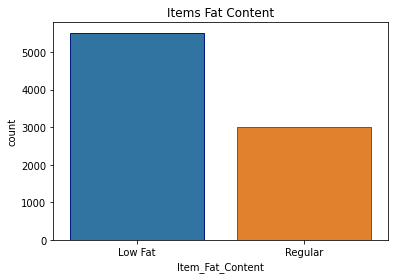

In [ ]:
sns.countplot(x = 'Item_Fat_Content',
              data = train_df,
              order = train_df['Item_Fat_Content'].value_counts().index,
              edgecolor=sns.color_palette("dark", 3))
plt.title('Items Fat Content')

In [ ]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

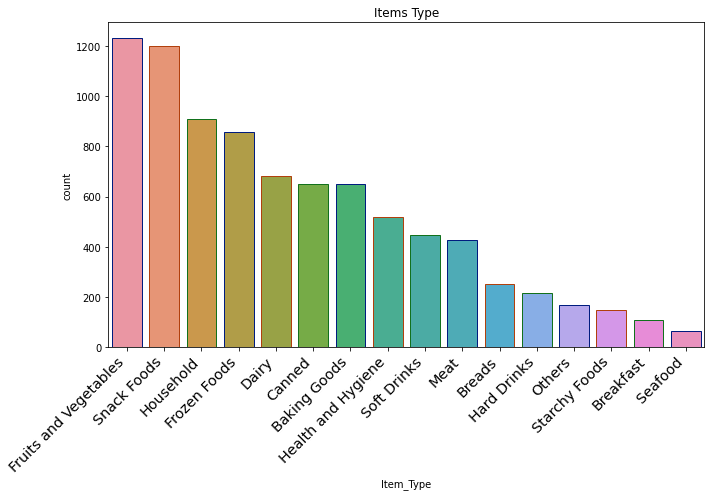

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Item_Type',
              data = train_df,
              order = train_df['Item_Type'].value_counts().index,
              edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Items Type')
plt.tight_layout()

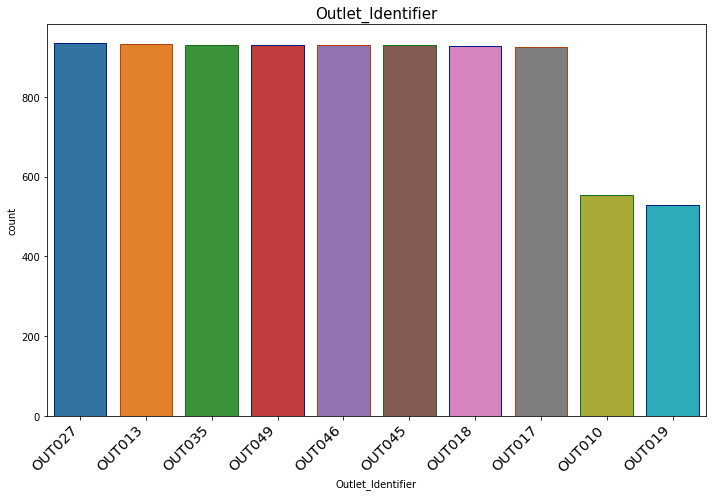

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Outlet_Identifier',
              data = train_df,
              order = train_df['Outlet_Identifier'].value_counts().index,
              edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Outlet_Identifier',fontsize=15)
plt.tight_layout()

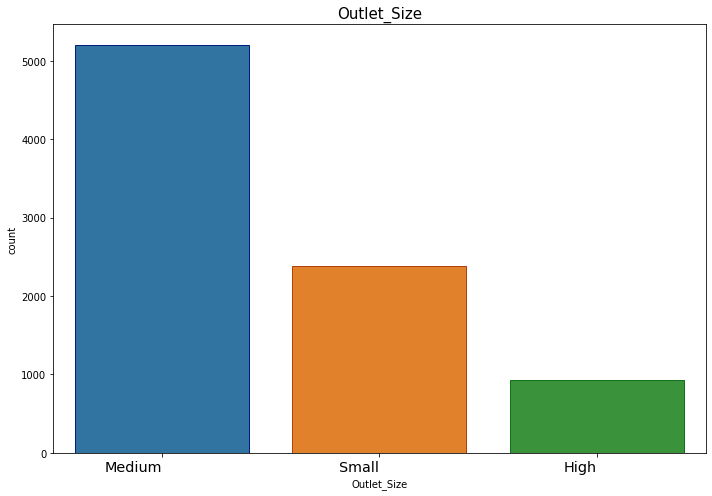

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Outlet_Size',
              data = train_df,
              order = train_df['Outlet_Size'].value_counts().index,
              edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Outlet_Size',fontsize=15)
plt.tight_layout()

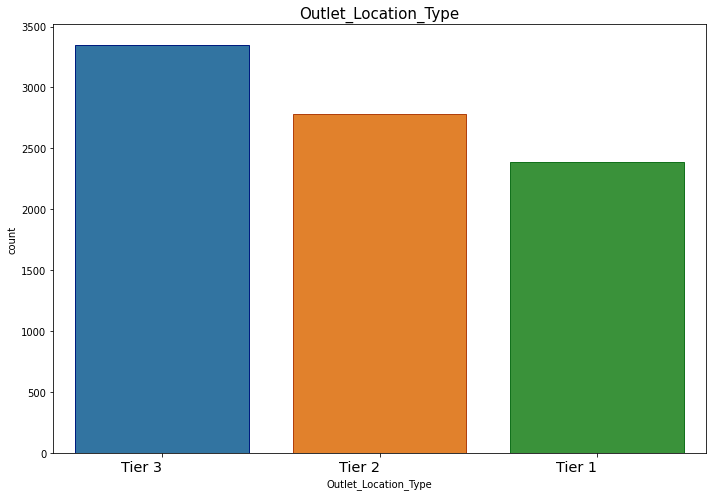

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Outlet_Location_Type',
              data = train_df,
              order = train_df['Outlet_Location_Type'].value_counts().index,
              edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Outlet_Location_Type',fontsize=15)
plt.tight_layout()

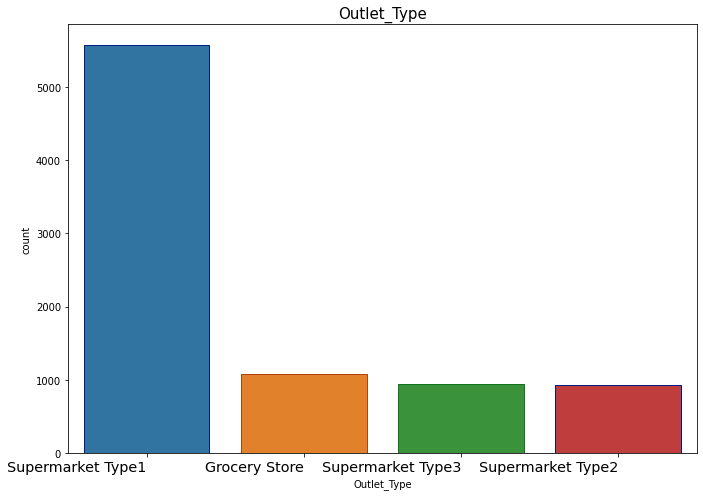

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Outlet_Type',
              data = train_df,
              order = train_df['Outlet_Type'].value_counts().index,
              edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Outlet_Type',fontsize=15)
plt.tight_layout()

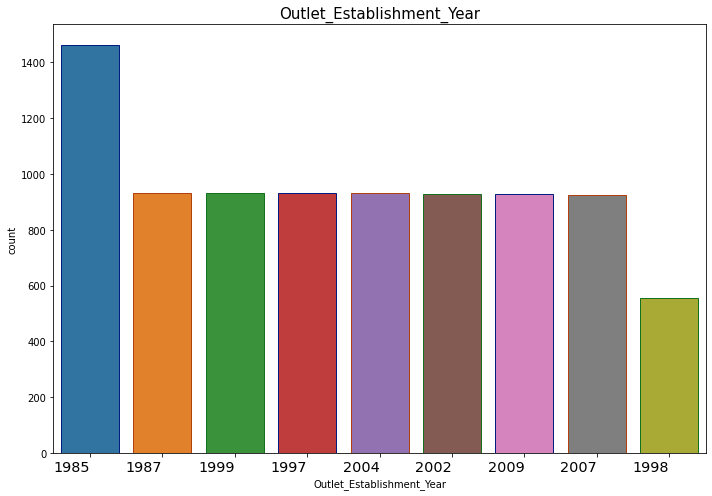

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Outlet_Establishment_Year',
              data = train_df,
              order = train_df['Outlet_Establishment_Year'].value_counts().index,
              edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Outlet_Establishment_Year',fontsize=15)
plt.tight_layout()

#Findings : 

Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years.

Supermarket Type 1 seems to be the most popular category of Outlet_Type.

Medium Size stores are more as compared to small and high size stores.

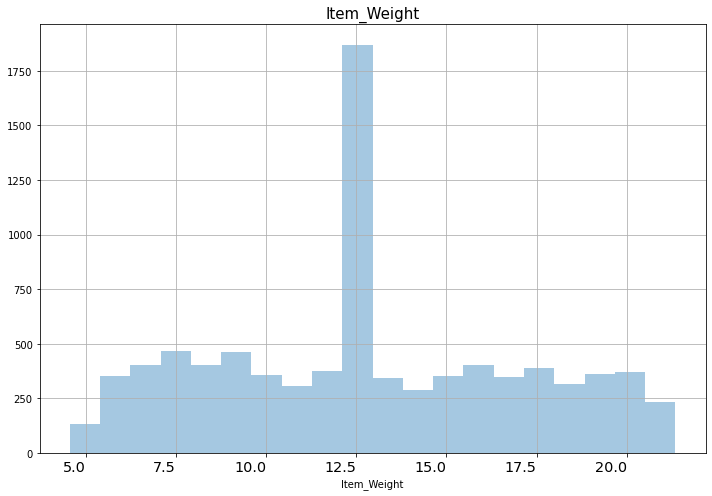

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(train_df['Item_Weight'],kde=False, bins=20)
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Item_Weight',fontsize=15)
plt.grid(b=True, which='major', linestyle='-')
plt.tight_layout()

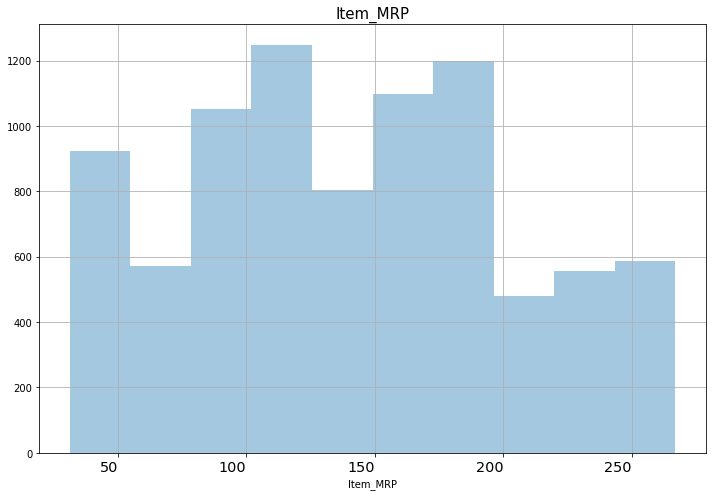

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(train_df['Item_MRP'],kde=False, bins=10)
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Item_MRP',fontsize=15)
plt.grid(b=True, which='major', linestyle='-')
plt.tight_layout()

There are 1220 items corresponding to the price range of Rs 100 to Rs 125 and 1200 items in the price range of Rs175 and Rs 195.
These two range of mrp corresponds to the highest mrp ranges compared to the rest.

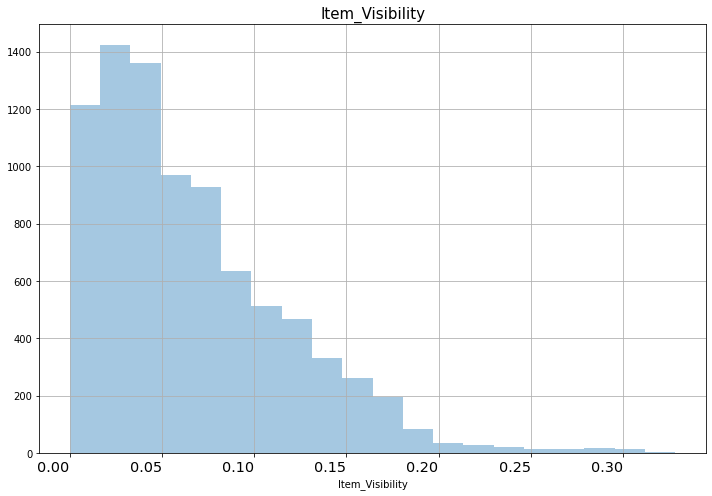

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(train_df['Item_Visibility'],kde=False, bins=20)
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Item_Visibility',fontsize=15)
plt.grid(b=True, which='major', linestyle='-')
plt.tight_layout()

From the above plot ,we can infer that The lowest visibile item or small items are high in number ,as the visibility of the item or size of items increases their count also decreases.

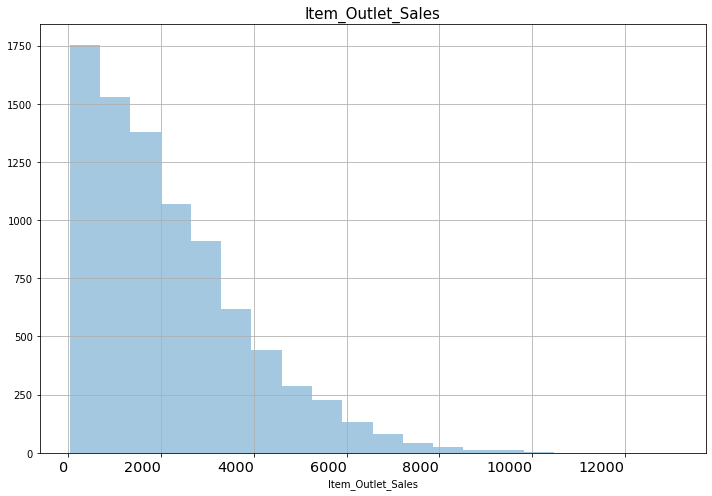

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(train_df['Item_Outlet_Sales'],kde=False, bins=20)
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Item_Outlet_Sales',fontsize=15)
plt.grid(b=True, which='major', linestyle='-')
plt.tight_layout()

There are very less stores which have outlet sales above 10000 sales.

##Bivariate Analysis

In [ ]:
#Bivariate analysis

In [ ]:
outlet_type = train_df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().sort_values().reset_index()

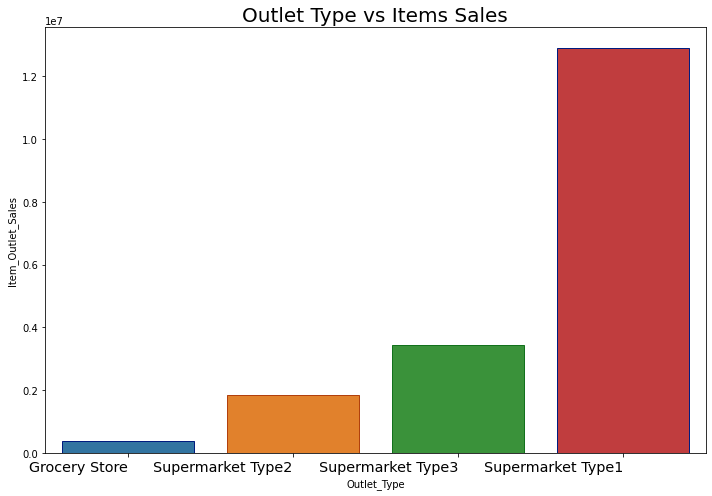

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Outlet_Type",y="Item_Outlet_Sales", data = outlet_type,
            edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Outlet Type vs Items Sales',fontsize=20)
plt.tight_layout()

Supermarket Type 1 - seems to have the highest sales as compared to other type of stores.
It can be because of the variety of reasons which we will explore later.

Grocery store is struggling,because of low sales

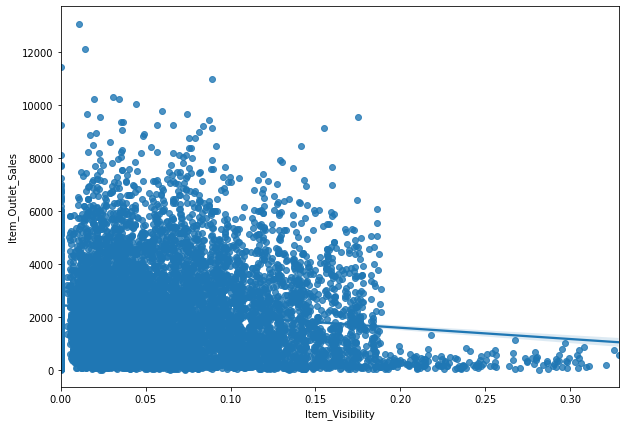

In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(x = "Item_Visibility",y="Item_Outlet_Sales", data = train_df)

There is no particular pattern observed here between the Item_Outlet_Sales and Item_Visibility.
In Item_Visibility vs Item_Outlet_Sales, there is a string of points at Item_Visibility = 0.0 which does not make any sense as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.

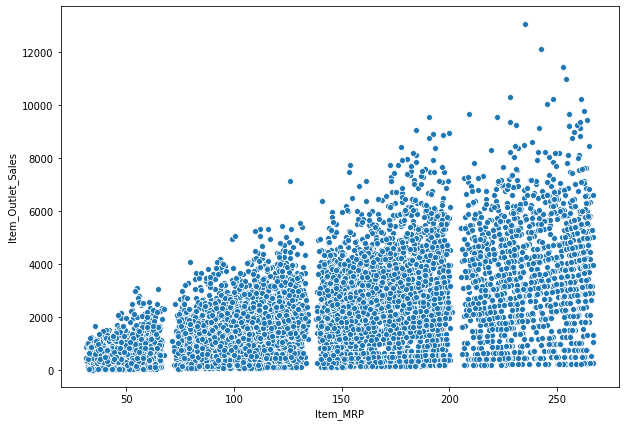

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = "Item_MRP",y="Item_Outlet_Sales", data = train_df)

In the above plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

In [ ]:
Outlet_Location_Type = train_df.groupby('Outlet_Location_Type').Item_Outlet_Sales.sum().sort_values().reset_index()

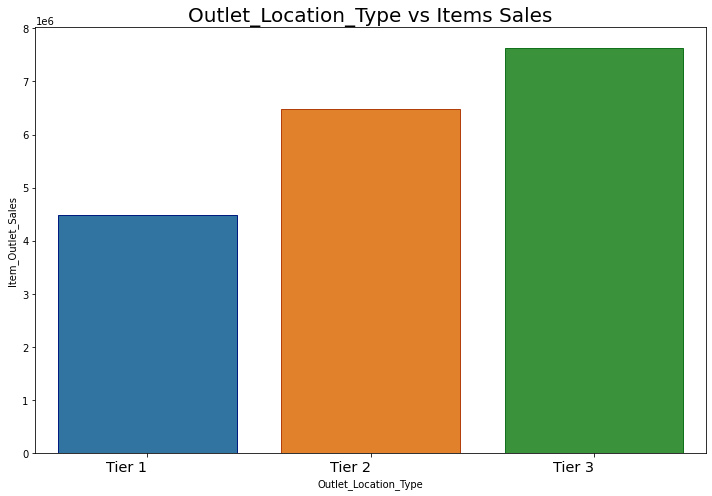

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Outlet_Location_Type",y="Item_Outlet_Sales", data = Outlet_Location_Type,
            edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Outlet_Location_Type vs Items Sales', fontsize=20)
plt.tight_layout()

Sales are more in Tier 3 locations, we need to focus more on Tier 1 location

In [ ]:
Outlet_Size = train_df.groupby('Outlet_Size').Item_Outlet_Sales.sum().sort_values().reset_index()

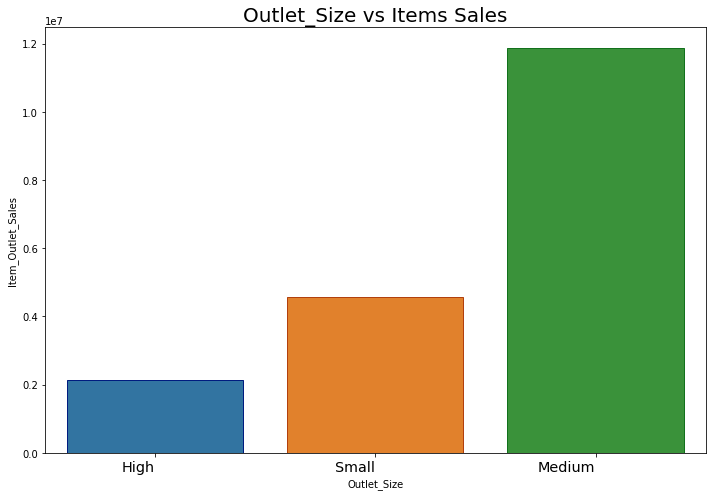

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Outlet_Size",y="Item_Outlet_Sales", data = Outlet_Size,
            edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Outlet_Size vs Items Sales', fontsize=20)
plt.tight_layout()

In [ ]:
Outlet_Establishment_Year = train_df.groupby('Outlet_Establishment_Year').Item_Outlet_Sales.sum().reset_index()

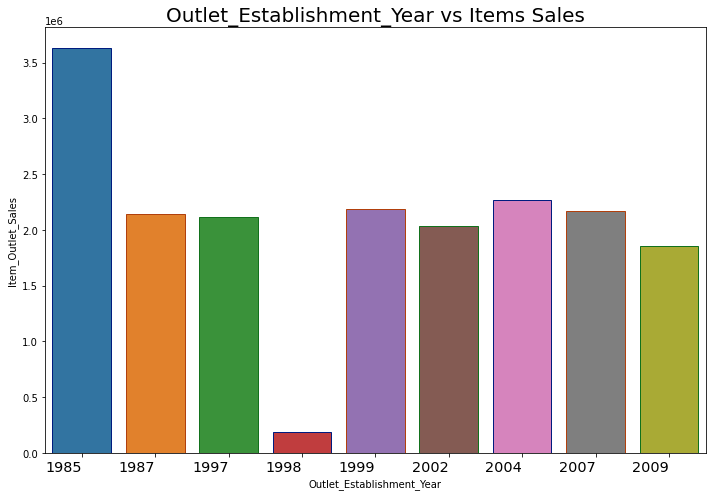

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Outlet_Establishment_Year",y="Item_Outlet_Sales", data = Outlet_Establishment_Year,
            edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Outlet_Establishment_Year vs Items Sales', fontsize=20)
plt.tight_layout()

In [ ]:
outlet_year = train_df[['Outlet_Establishment_Year','Item_Outlet_Sales']].groupby('Outlet_Establishment_Year').sum()
values = outlet_year.values.flatten()
labels = outlet_year.index
fig = go.Figure(data=[go.Pie(labels = labels, values=values)])
fig.update(layout_title_text='Item_Outlet_Sales - 1984-2010')
fig.show()


In [ ]:
outlet_iden = train_df[['Outlet_Identifier','Item_Outlet_Sales']].groupby('Outlet_Identifier').sum()
values = outlet_iden.values.flatten()
labels = outlet_iden.index
fig = go.Figure(data=[go.Pie(labels = labels, values=values)])
fig.update(layout_title_text=' Total_sales for each Outlet_Identifier')
fig.show()


OUTO27  is having highest sales percentage while OUTO10 and OUTO19 need's more focus

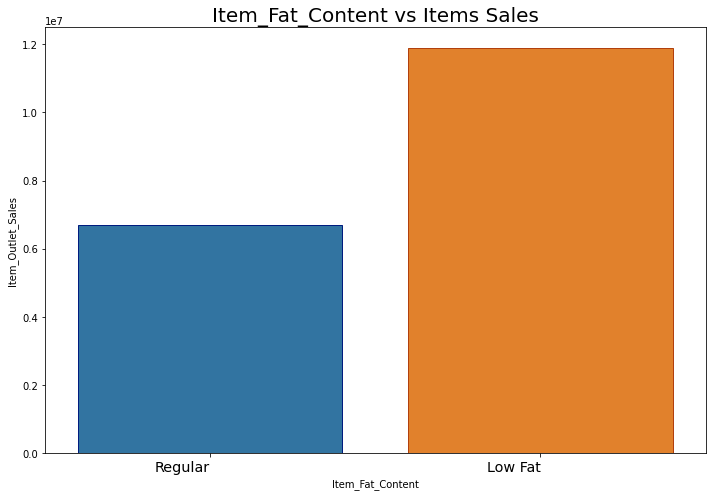

In [ ]:
Item_Fat_Content = train_df.groupby('Item_Fat_Content').Item_Outlet_Sales.sum().sort_values().reset_index()

plt.figure(figsize=(10,7))
sns.barplot(x = "Item_Fat_Content",y="Item_Outlet_Sales", data = Item_Fat_Content,
            edgecolor=sns.color_palette("dark", 3))
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.title('Item_Fat_Content vs Items Sales',fontsize=20)
plt.tight_layout()


##Multivariate Analysis 



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

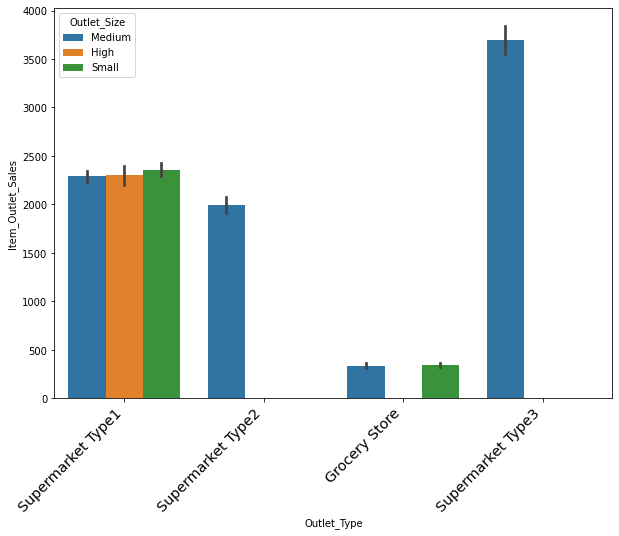

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_df,hue='Outlet_Size')

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
#plt.title('Measure VS Passenger Count - Border Wise', fontsize=20)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

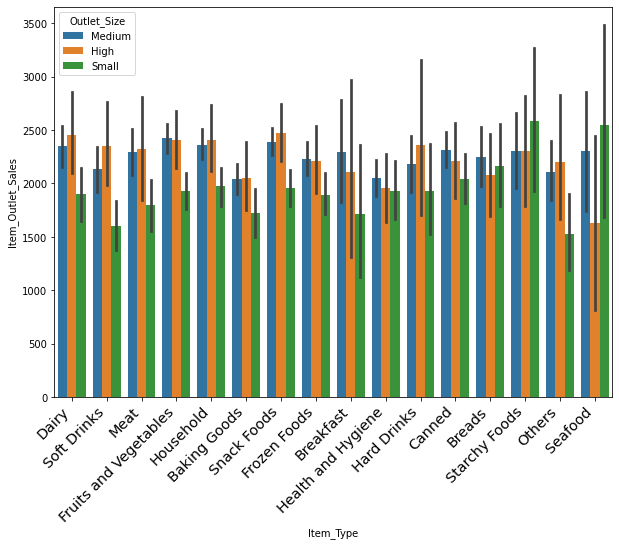

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train_df,hue='Outlet_Size')

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
#plt.title('Measure VS Passenger Count - Border Wise', fontsize=20)


(array([-5000.,     0.,  5000., 10000., 15000.]),
 <a list of 0 Text major ticklabel objects>)

<Figure size 720x504 with 0 Axes>

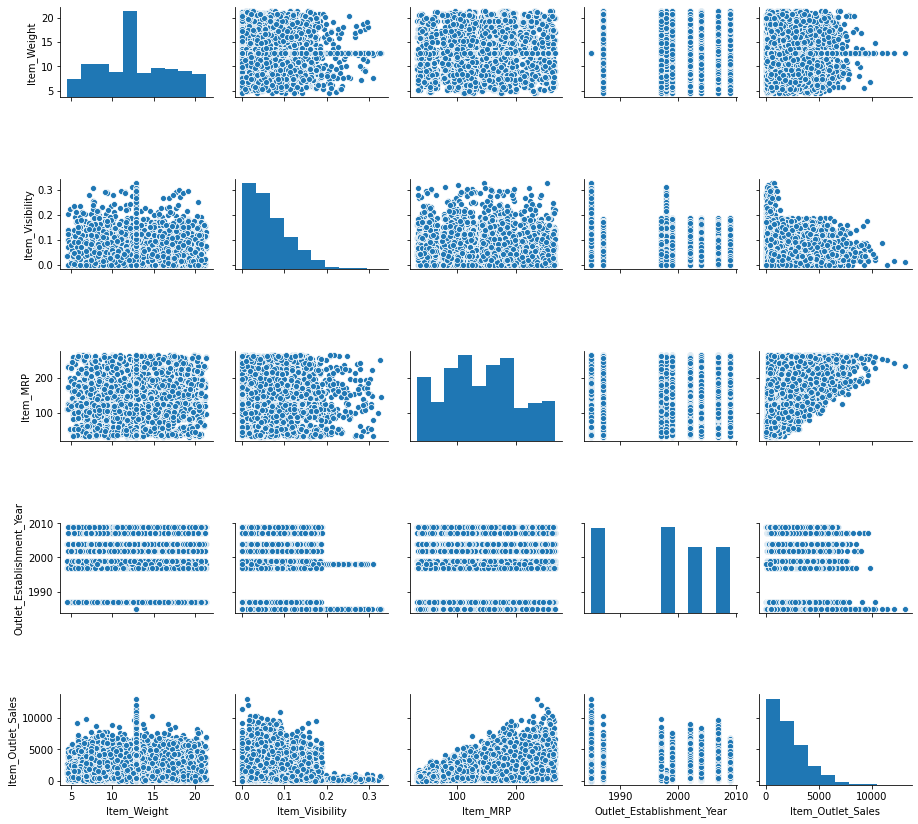

In [ ]:
plt.figure(figsize=(10,7))
sns.pairplot(train_df[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']])

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
#plt.title('Measure VS Passenger Count - Border Wise', fontsize=20)

# Findings :

Outlet_Establishment_Year vs Item_Weight,Outlet_Establishment_Year vs Item_Visibility or Outlet_Establishment_Year vs Item_MRP does not hold any significant correlation.

If we see the Item_MRP vs Item_Outlet_Sales plot we can see that as the MRP of items increases the sales is also increasing. 


#Data Pre-Processing

# What is Data PreProcessing?
In simple words, pre-processing refers to the transformations applied to your data before feeding it to the algorithm. It invloves further cleaning of data, data transformation, data scaling and many more things.

For our data, we will deal with the skewness and scale the numerical variables

# Encoding Categorical Variables
Most of the machine learning algorithms produce better result with numerical variables only. So, it is essential to treat the categorical variables present in the data. One thing that can be done is to completely remove the categorical variables, but that would lead to enormous loss of information. Fortunately we have smarter techniques to deal with the categorical variables.

In this stage, we will convert our categorical variables into numerical ones. We will use  One Hot Encoding.

In One hot encoding, each category of a categorical variable is converted into a new binary column (which is 0 or 1).

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# One hot encoding for the categorical variable

In [ ]:
Item_Fat_Content= pd.get_dummies(train_df['Item_Fat_Content'], drop_first=True)


In [ ]:
train_df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
fe = train_df.groupby('Item_Type').size()/len(train_df)
train_df.loc[:, 'Item_Type_freq'] = train_df['Item_Type'].map(fe)
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_freq
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.080019
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.052212
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.049865
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0.144550
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.106770


In [ ]:
train_df.Item_Type_freq.unique()

array([0.08001877, 0.05221166, 0.04986507, 0.14455004, 0.10676992,
       0.07602957, 0.14079549, 0.10043412, 0.01290625, 0.06101138,
       0.02510853, 0.0761469 , 0.02944972, 0.01736478, 0.0198287 ,
       0.00750909])

In [ ]:
train_df.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
Outlet_Size = pd.get_dummies(train_df['Outlet_Size'], drop_first=True)
Outlet_Location_Type = pd.get_dummies(train_df['Outlet_Location_Type'], drop_first=True)
Outlet_Type = pd.get_dummies(train_df['Outlet_Type'], drop_first=True)

In [ ]:
train_df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
Outlet_Identifier = pd.get_dummies(train_df['Outlet_Identifier'], drop_first=True)

In [ ]:
train_df.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [ ]:
train_df.groupby('Item_Identifier').filter(lambda x: len(x)==4
                                        ).nunique()

Item_Identifier              234
Item_Weight                  153
Item_Fat_Content               2
Item_Visibility              888
Item_Type                     16
Item_MRP                     859
Outlet_Identifier             10
Outlet_Establishment_Year      9
Outlet_Size                    3
Outlet_Location_Type           3
Outlet_Type                    4
Item_Outlet_Sales            783
Item_Type_freq                16
dtype: int64

In [ ]:
train_df.groupby('Item_Type')['Item_Identifier'].unique()

Item_Type
Baking Goods             [FDP36, FDW12, FDC37, FDL12, FDN48, FDR12, FDA...
Breads                   [FDO23, FDV11, FDW11, FDR47, FDZ35, FDV59, FDP...
Breakfast                [FDP49, FDQ49, FDN13, FDN01, FDM25, FDO01, FDM...
Canned                   [FDC14, FDC02, FDL50, FDV49, FDR13, FDI26, FDG...
Dairy                    [FDA15, FDA03, FDU02, FDE51, FDV38, FDM39, FDS...
Frozen Foods             [FDH17, FDU28, FDR28, FDM40, FDY40, FDC29, FDL...
Fruits and Vegetables    [FDX07, FDY07, FDX32, FDF32, FDV20, FDA43, FDM...
Hard Drinks              [DRI11, DRJ59, DRK35, DRG23, DRM47, DRP47, DRQ...
Health and Hygiene       [NCB42, NCS17, NCX29, NCP05, NCL17, NCI17, NCR...
Household                [NCD19, NCB30, NCD06, NCP18, NCX54, NCZ18, NCL...
Meat                     [FDN15, FDK43, FDV27, FDH19, FDN27, FDW39, FDW...
Others                   [NCN07, NCO55, NCM43, NCN55, NCO07, NCM31, NCK...
Seafood                  [FDG33, FDH21, FDG21, FDJ57, FDJ45, FDI57, FDK...
Snack Foods    

In [ ]:
train_df['Eatables']=train_df[train_df.Item_Identifier.str.startswith('FD')].Item_Identifier.apply(lambda x: x.replace(x,'eatables'))
train_df['Drinks']=train_df[train_df.Item_Identifier.str.startswith('DR')].Item_Identifier.apply(lambda x: x.replace(x,'Drinks'))
train_df['consumer_goods']=train_df[train_df.Item_Identifier.str.startswith('NC')].Item_Identifier.apply(lambda x: x.replace(x,'consumer_goods'))
    

                   #train_df.Item_Identifier.str.startswith('FD'): 'Eatables',
                   #train_df.Item_Identifier.str.startswith('DR'): 'Drinks',
                   #train_df.Item_Identifier.str.startswith('NC'):'consumer_goods'
                # }, regex=True))

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_freq,Eatables,Drinks,consumer_goods
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.080019,eatables,NaN,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.052212,NaN,Drinks,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.049865,eatables,NaN,NaN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0.144550,eatables,NaN,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.106770,NaN,NaN,consumer_goods


In [ ]:
eatables = pd.get_dummies(train_df['Eatables'])
Drinks = pd.get_dummies(train_df['Drinks'])


In [ ]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_freq', 'Eatables',
       'Drinks', 'consumer_goods'],
      dtype='object')

In [ ]:
train_df.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Drinks','Eatables','consumer_goods'], axis=1,inplace=True)

In [ ]:
train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_freq
0,9.30,0.016047,249.8092,1999,3735.1380,0.080019
1,5.92,0.019278,48.2692,2009,443.4228,0.052212
2,17.50,0.016760,141.6180,1999,2097.2700,0.049865
3,19.20,0.000000,182.0950,1998,732.3800,0.144550
4,8.93,0.000000,53.8614,1987,994.7052,0.106770


In [ ]:
train_df=pd.concat([train_df,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,eatables,Drinks ],axis=1)

In [ ]:
train_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_freq,Regular,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,eatables,Drinks
0,9.30,0.016047,249.8092,1999,3735.1380,0.080019,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,2009,443.4228,0.052212,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
2,17.50,0.016760,141.6180,1999,2097.2700,0.049865,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
3,19.20,0.000000,182.0950,1998,732.3800,0.144550,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,8.93,0.000000,53.8614,1987,994.7052,0.106770,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [ ]:
train_df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Type_freq',
       'Regular', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035',
       'OUT045', 'OUT046', 'OUT049', 'Medium', 'Small', 'Tier 2', 'Tier 3',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'eatables', 'Drinks'],
      dtype='object')

In [ ]:
x = train_df[['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Type_freq',
       'Regular', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035',
       'OUT045', 'OUT046', 'OUT049', 'Medium', 'Small', 'Tier 2', 'Tier 3',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'eatables', 'Drinks']]
y_1 = train_df['Item_Outlet_Sales']

# Multiple Regressor Model :

In [ ]:
import statsmodels.api as sm
X_1 = sm.add_constant(x)
model1=sm.OLS(y_1,X_1)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     686.4
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:40:42   Log-Likelihood:                -71990.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8506   BIC:                         1.441e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Observations:

1) Here the R squared statistic value indicates that 56.4 percentage of the variance in the dependent variable is explained by independent variables collectively. So, the model does not do a good job explaining the changes in the dependent variable. Adjusted R square is the same as R squared stating all variables are significant.

2) H0: Variables are not carrying any information towards the target variable. (b=0) H1: Variables are carrying info towards target variable. (b != 0) Here it can be seen that F-statistic value is large and for some independent valriables the p value is not less than 0.05

3) The maximum value for the log of the likelihood function is -71990, the likelihood that the process described by the model produced the data that were observed (maximise the probability of observing the data).

4) Omnibus is a test of the skewness and kurtosis of the residual. The value is relatively high, and the probability of omnibus is relatively low indicating that the residual is not normally distributed.

5) Even the skew value is not close to 0 confirming the above result.

6) DW value suggests that there is positive autocorrelation. That is, error of a given sign tends to be followed by an error of the same sign. For example, positive errors are usually followed by positive errors, and negative errors are usually followed by negative errors.

7) Kurtosis of the normal distribution is 5.168. In this case it is close to 5, validates the other results.

8) A large JB value is seen and the probability of JB is 0 indicating that the errors are not normally distributed.

9) In linear regression the condition number of the moment matrix can be used as a diagnostic for multicollinearity. A relatively small number (<30) is required, in this case it is much more higher then the ideal value.

In [ ]:
predictedValues = result.predict()
print(predictedValues)
#print predictedValues

res = y_1 - predictedValues

[4061.15346312  574.98346048 2375.22482836 ... 1511.023284   1403.92182639
 1220.31281192]


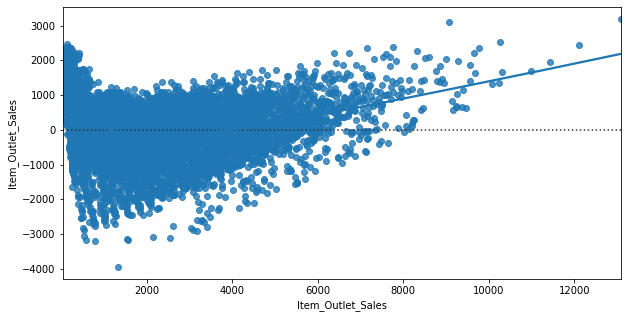

In [ ]:
plt.figure(figsize=(10,5))
sns.residplot(x=y_1, y=res, lowess=True)

Since , the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data.

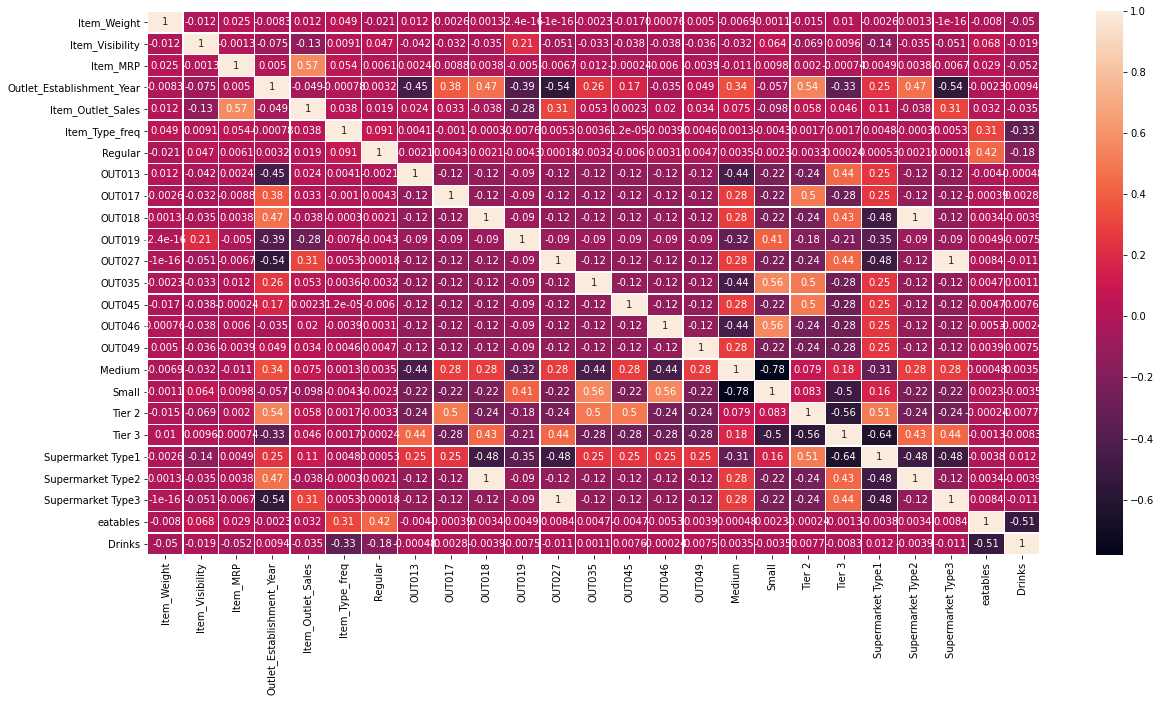

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(), annot=True, linewidths=0.3, linecolor='white')

We will now ,drop the non significant independent features from "train_df" and assign it to X_1 and transform "Item_Outlet_Sales" and assign it to y 
and check the relationship between multiple independent/predictor variables and one dependent or criterion variable

In [ ]:
x_1 = train_df[[ 'Item_MRP',
       'Outlet_Establishment_Year',
       'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035',
        'OUT046', 'OUT049', 'Medium', 'Small', 'Tier 2', 'Tier 3',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'
       ]]
y= train_df['Item_Outlet_Sales']
y_1 = np.log10(train_df['Item_Outlet_Sales'])

In [ ]:
import statsmodels.api as sm
X_11 = sm.add_constant(x_1)
model1=sm.OLS(y_1,X_11)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     2194.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:40:49   Log-Likelihood:                 303.43
No. Observations:                8523   AIC:                            -584.9
Df Residuals:                    8512   BIC:                            -507.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Observations : 

1) We can see from the above statistical results , after dropping the non correlated features from the dataset ,increases R square .
Therefore ,increasing the model accuracy from 56.4% to 72.1%

2) The maximum value for the log of the likelihood function has decreased from -71990 to 303.43.

3) Kurtosis of the normal distribution has been decreased from 5.168 to 3.928. 

4) A large JB value is seen and the probability of JB is >0 indicating that the errors are normally distributed.



In [ ]:
predictedValues = result.predict()
print(predictedValues)
#print predictedValues

res = y - predictedValues

[3.66495555 2.8471437  3.27493433 ... 3.07939236 3.04492434 3.01692518]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_

53183.27105632759

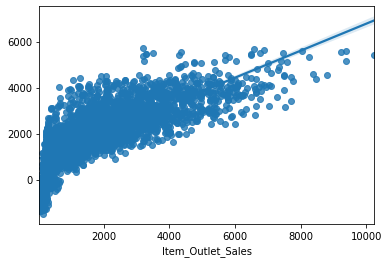

In [ ]:
predictions = lm.predict(X_test)
sns.regplot(y_test, predictions)

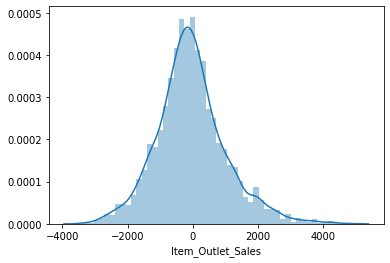

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
#predictions_new = np.exp(predictions)
#y_test_new = np.exp(y_test)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2:', metrics.r2_score(y_test, predictions))


MAE: 809.2655205341301
MSE: 1158794.6400944747
RMSE: 1076.473241699242
r2: 0.5686783728437202


In [ ]:
accuracy = lm.score(X_test,y_test)
print(accuracy*100)

56.86783728437202


In [ ]:
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(lm, X_train, y_train, cv=10)
print('Accuracy {:.2f} '.format(scores_lr.mean()*100))
print('Standard_deviation {:.2f} '.format(scores_lr.std()*100))

Accuracy 55.65 
Standard_deviation 2.00 


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [{'max_depth':np.arange(1, 21),
               'min_samples_split':np.arange(1,15),
              'min_samples_leaf':np.arange(1, 30)}]
grid_cv= GridSearchCV(DecisionTreeRegressor(random_state=101), param_grid)
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

{'max_depth': 5, 'min_samples_leaf': 29, 'min_samples_split': 2}

In [ ]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=grid_cv.best_params_['max_depth'], min_samples_leaf=grid_cv.best_params_['min_samples_leaf'], min_samples_split=2)

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=29, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
predict = tree.predict(X_test)

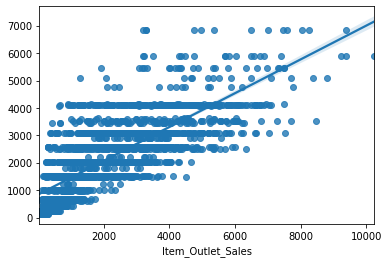

In [ ]:
sns.regplot(y_test, predict)

In [ ]:
#predictions_new_tree = np.exp(predict)
#y_test_new = np.exp(y_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('r2:', metrics.r2_score(y_test, predict))

MAE: 736.1570598519316
MSE: 1084190.0989281668
RMSE: 1041.2444952690828
r2: 0.5964473588018155


In [ ]:
scores_tree = cross_val_score(tree, X_train, y_train, cv=10)
print('Accuracy {:.2f} '.format(scores_tree.mean()*100))
print('Standard_deviation {:.2f} '.format(scores_tree.std()*100))

Accuracy 58.62 
Standard_deviation 2.35 


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
estimator = RandomForestRegressor(random_state=101)
param_grid = { 
            "n_estimators"      : [10,20,30,40,50,60,70,80,90,100],
            "max_depth": np.arange(1,50),
            "min_samples_split": [1,2,3,4],
            }
estimator.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False)

In [ ]:
predict_rf = estimator.predict(X_test)

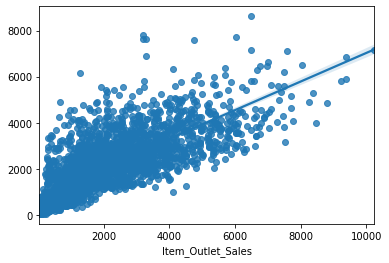

In [ ]:
sns.regplot(y_test, predict_rf)

In [ ]:
#predictions_new_rf = np.exp(predict_rf)
#y_test_new = np.exp(y_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_rf))
print('MSE:', metrics.mean_squared_error(y_test, predict_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_rf)))
print('r2:', metrics.r2_score(y_test, predict_rf))

MAE: 766.0494409041845
MSE: 1177071.7159202031
RMSE: 1084.9293598756572
r2: 0.5618753571824042


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X_train, y_train, cv=10)

In [ ]:
scores

array([0.52578535, 0.56110963, 0.55180459, 0.51884997, 0.54683157,
       0.56619416, 0.53897667, 0.50093504, 0.5916892 , 0.62245623])

## XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
regressor = XGBRegressor(random_state=101)

In [ ]:
regressor.fit(X_train,y_train)

[12:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
predict_xgb = regressor.predict(X_test)


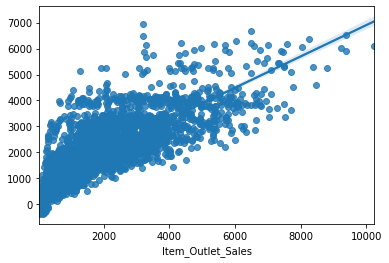

In [ ]:
sns.regplot(y_test, predict_xgb)

In [ ]:
predictions_new_xgb = np.exp(predict_xgb)
y_test_new = np.exp(y_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predict_xgb))
print('MSE:', metrics.mean_squared_error(y_test, predict_xgb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_xgb)))
print('r2:', metrics.r2_score(y_test, predict_xgb))

MAE: 741.4312545597694
MSE: 1067274.8840334455
RMSE: 1033.0899689927521
r2: 0.6027434683622589


In [ ]:
scores_xgb = cross_val_score(regressor, X_train, y_train, cv=10)
print('Accuracy {:.2f} '.format(scores_xgb.mean()*100))
print('Standard_deviation {:.2f} '.format(scores_xgb.std()*100))

[12:55:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
scores_xgb

array([0.58779368, 0.57891848, 0.5823429 , 0.55900825, 0.59706212,
       0.59566062, 0.55488376, 0.54876875, 0.58406278, 0.64214434])

# Thanks